<a href="https://colab.research.google.com/github/macrotentional/DS-Unit-2-Linear-Models/blob/master/Martin_Campbell_DS15_LS_DS_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [x] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [x] Engineer at least two new features. (See below for explanation & ideas.)
- [x] Fit a linear regression model with at least two features.
- [x] Get the model's coefficients and intercept.
- [x] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [x] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [x] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [0]:
df.describe

<bound method NDFrame.describe of        bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0            1.5         3  ...                 0                    0
1            1.0         2  ...                 0                    0
2            1.0         1  ...                 0                    0
3            1.0         1  ...                 0                    0
4            1.0         4  ...                 0                    0
...          ...       ...  ...               ...                  ...
49347        1.0         2  ...                 0                    0
49348        1.0         1  ...                 0                    1
49349        1.0         1  ...                 0                    0
49350        1.0         0  ...                 0                    0
49351        1.0         2  ...                 0                    0

[48817 rows x 34 columns]>

In [0]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.tail(20)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-29 17:23:33,1.0,1,2016-06-29 17:23:33,NaN,West 28th Street,40.7512,-74.0026,3820,525 West 28th Street,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-29 17:23:34,1.0,1,2016-06-29 17:23:34,NaN,Avenue C,40.7257,-73.9780,2050,153 Avenue C,low,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-29 17:23:45,1.0,1,2016-06-29 17:23:45,NaN,East 34th Street,40.7439,-73.9743,3760,340 East 34TH Street,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-29 17:24:39,1.0,3,2016-06-29 17:24:39,NaN,West 109th Street,40.8034,-73.9662,4000,247 West 109th Street,low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-29 17:27:07,1.0,1,2016-06-29 17:27:07,NaN,West 70th Street,40.7856,-73.9498,4200,154 West 70TH Street,low,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-29 17:28:43,1.0,2,2016-06-29 17:28:43,NaN,East 22nd Street,40.7377,-73.9831,5595,210 East 22nd Street,low,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-29 17:28:51,1.0,1,2016-06-29 17:28:51,NaN,West 30th Street,40.7521,-74.0011,4415,500 West 30th Street,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-29 17:29:26,1.0,1,2016-06-29 17:29:26,NaN,Riverside Boulevard,40.7770,-73.9886,4065,140 RIVERSIDE BOULEVARD,low,1,1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2016-06-29 17:31:15,1.0,1,2016-06-29 17:31:15,NaN,West 39th Street,40.7556,-73.9922,4095,330 West 39th Street,low,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [0]:
df['created'] = pd.to_datetime(df['created'])

In [0]:
df = df.set_index(df['created'])

In [0]:
df = df.sort_index()

#rentbydate = df.sort_values('created')
#rentbydate

df

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-01 22:12:41,1.0,1,2016-04-01 22:12:41,X-LARGE Flex 1BR Loft! ~~ PRIME Greenwich Vill...,Astor Place,40.7302,-73.9924,3195,1 Astor Place,high,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-01 22:56:00,1.0,0,2016-04-01 22:56:00,"This Enormous Studio Features: Harwood Floors,...",East 54th Street,40.7576,-73.9677,2000,230 East 54th Street,medium,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-01 22:57:15,2.0,3,2016-04-01 22:57:15,--- East 31st St & Lexington Avenue --- This S...,East 31st St & Lexington Avenue,40.7388,-73.9851,5850,105 Lexington Avenue,high,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2016-04-01 23:26:07,1.0,1,2016-04-01 23:26:07,Reduced Fee!! Priced To Rent!\rLarge Newly Upd...,West End Ave,40.7939,-73.9738,2745,700 West End Ave,medium,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2016-04-02 00:48:13,1.0,1,2016-04-02 00:48:13,Phenomenal deal of the century!! This spacious...,E 88th street,40.7784,-73.9491,2400,401 E 88th street,medium,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-29 17:47:34,1.0,2,2016-06-29 17:47:34,"Newly renovated, clean, quiet & very bright 2...",At Thompson St,40.7261,-74.0014,3045,132 Thompson St #20,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-29 17:56:12,1.0,1,2016-06-29 17:56:12,Historic conversion in Greenpoint with awesome...,"100 Dupont St, Brooklyn, NY 11222",40.7358,-73.9560,2648,100 Dupont St,low,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2016-06-29 18:14:48,1.0,1,2016-06-29 18:14:48,"Large, sunny one bedroom apartment with a sepa...",West 45th St. and 8th Ave.,40.7597,-73.9890,2650,305 West 45th St.,low,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.dtypes

bathrooms                      float64
bedrooms                         int64
created                 datetime64[ns]
description                     object
display_address                 object
latitude                       float64
longitude                      float64
price                            int64
street_address                  object
interest_level                  object
elevator                         int64
cats_allowed                     int64
hardwood_floors                  int64
dogs_allowed                     int64
doorman                          int64
dishwasher                       int64
no_fee                           int64
laundry_in_building              int64
fitness_center                   int64
pre-war                          int64
laundry_in_unit                  int64
roof_deck                        int64
outdoor_space                    int64
dining_room                      int64
high_speed_internet              int64
balcony                  

In [103]:
#train = df [ df['created'] < 2016-06-01 00:00:00 ]
#test = df [ df['created'] >= 2016-06-01 00:00:00 ]

target = 'price'

train = df['2016-04-01 00:00:00':'2016-05-31 23:59:59']
test = df['2016-06-01 00:00:00' :]

print('Train dataset:',train.shape)
print('Test dataset:',test.shape)

Train dataset: (31844, 36)
Test dataset: (16973, 36)


In [0]:
#df['dd'] = df['created'].dt.day
#df['mm'] = df['created'].dt.month
#df['yy'] = df['created'].dt.year
#df.head()

In [104]:
train['price'].mean()

3575.604007034292

In [105]:
guess = train['price'].mean()
print (guess)

3575.604007034292


In [0]:
y_train = train[target]
y_test = test[target]


In [0]:
# Train error
#from sklearn.metrics import mean_absolute_error
#y_pred = [guess] * len(y_train)
#mae = mean_absolute_error(y_train, y_pred)
#print(f'Train error (NYC rent): {mae:.2f} percent')

TypeError: ignored

In [0]:
#def fullamenities()

#df['fitness_washer'] = 1 

In [78]:
#laundry = df['laundry_in_building']
#dishwasher = df['dishwasher']
#df['laundry_washer'] = pd.concat([laundry, dishwasher])
#df['laundry_washer'].head(40)

ValueError: ignored

In [107]:
df['laundry_washer'] = df['laundry_in_building'] + df['dishwasher']
df['fitness_washer'] = df['laundry_in_building'] + df['dishwasher']
print(df)

                     bathrooms  bedrooms  ... laundry_washer fitness_washer
created                                   ...                              
2016-04-01 22:12:41        1.0         1  ...              1              1
2016-04-01 22:56:00        1.0         0  ...              1              1
2016-04-01 22:57:15        2.0         3  ...              1              1
2016-04-01 23:26:07        1.0         1  ...              1              1
2016-04-02 00:48:13        1.0         1  ...              1              1
...                        ...       ...  ...            ...            ...
2016-06-29 17:47:34        1.0         2  ...              0              0
2016-06-29 17:56:12        1.0         1  ...              2              2
2016-06-29 18:14:48        1.0         1  ...              2              2
2016-06-29 18:30:41        1.0         3  ...              0              0
2016-06-29 21:41:47        1.0         3  ...              0              0

[48817 rows

In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [109]:
features = ['balcony', 
            'cats_allowed']
print(f'Linear Regression, dependent on: {features}')


X_train = train[features]
X_test = test[features]

Linear Regression, dependent on: ['balcony', 'cats_allowed']


In [110]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X_train)

In [117]:
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: ${mae:.2f}')

Train Error: $1185.87


In [113]:
model.intercept_, model.coef_

(3434.267647292999, array([958.2351318 , 174.24564267]))

In [114]:
beta0 = model.intercept_
beta1, beta2 = model.coef_
print(f'y ={beta0} + {beta1}x1 + {beta2}x2')

y =3434.267647292999 + 958.2351317973829x1 + 174.24564266852707x2


In [115]:
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept 3434.267647292999
balcony         958.235132
cats_allowed    174.245643


In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

Mean Squared Error: 3105028.2178912424
Root Mean Squared Error: 1762.1090255404863
Mean Absolute Error: 1201.8811133682555
R^2: 0.0


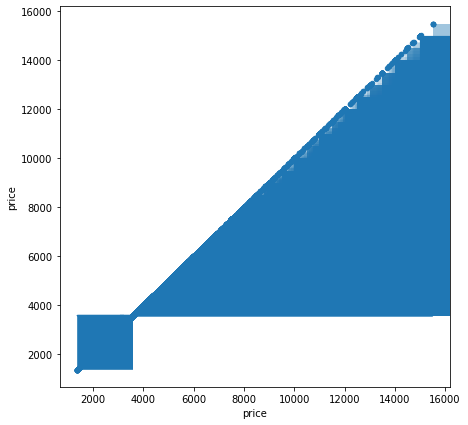

In [120]:
feature = 'price'
squared_errors(train, feature, target, m=0, b=y_train.mean())

In [124]:
mae_train = mean_absolute_error(y_train, y_pred)
mae_train

1185.8656062001658

In [125]:
mse_train = mean_squared_error(y_train, y_pred)
mse_train

3044222.479520111

In [127]:
rmse_train = np.sqrt(mse_train)
rmse_train

1744.7700362856162

In [129]:
r2_train = r2_score(y_train, y_pred)
r2_train

0.019582990589511295